In [1]:
from IPython.display import Markdown as md

### change to reflect your notebook
_nb_loc = "05_create_dataset/05_audio.ipynb"
_nb_title = "Vision ML on Audio, Video, Text, etc."

### no need to change any of this
_nb_safeloc = _nb_loc.replace('/', '%2F')
_nb_safetitle = _nb_title.replace(' ', '+')
md("""
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name={1}&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F{2}&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F{2}">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/{0}">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/{0}">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>
""".format(_nb_loc, _nb_safetitle, _nb_safeloc))


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://console.cloud.google.com/ai-platform/notebooks/deploy-notebook?name=Vision+ML+on+Audio,+Video,+Text,+etc.&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fblob%2Fmaster%2F05_create_dataset%2F05_audio.ipynb&download_url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fpractical-ml-vision-book%2Fraw%2Fmaster%2F05_create_dataset%2F05_audio.ipynb">
    <img src="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/logo-cloud.png"/> Run in AI Platform Notebook</a>
  </td>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/GoogleCloudPlatform/practical-ml-vision-book/blob/master/05_create_dataset/05_audio.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/GoogleCloudPlatform/practical-ml-vision-book/blob/master/05_create_dataset/05_audio.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://raw.githubusercontent.com/GoogleCloudPlatform/practical-ml-vision-book/master/05_create_dataset/05_audio.ipynb">
    <img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>


# Vision ML on Audio, Video, Text, etc.

This notebook shows you how to use the spectrogram
of an audio file as a grayscale image input to an
ML model.


In [ ]:
!gsutil cp gs://ml-design-patterns/audio_train/00353774.wav cello.wav
!gsutil cp gs://ml-design-patterns/audio_train/001ca53d.wav sax.wav

Copying gs://ml-design-patterns/audio_train/00353774.wav...
/ [1 files][389.4 KiB/389.4 KiB]                                                
Operation completed over 1 objects/389.4 KiB.                                    
Copying gs://ml-design-patterns/audio_train/001ca53d.wav...
/ [1 files][888.9 KiB/888.9 KiB]                                                
Operation completed over 1 objects/888.9 KiB.                                    


(129, 2031)
(129, 889)


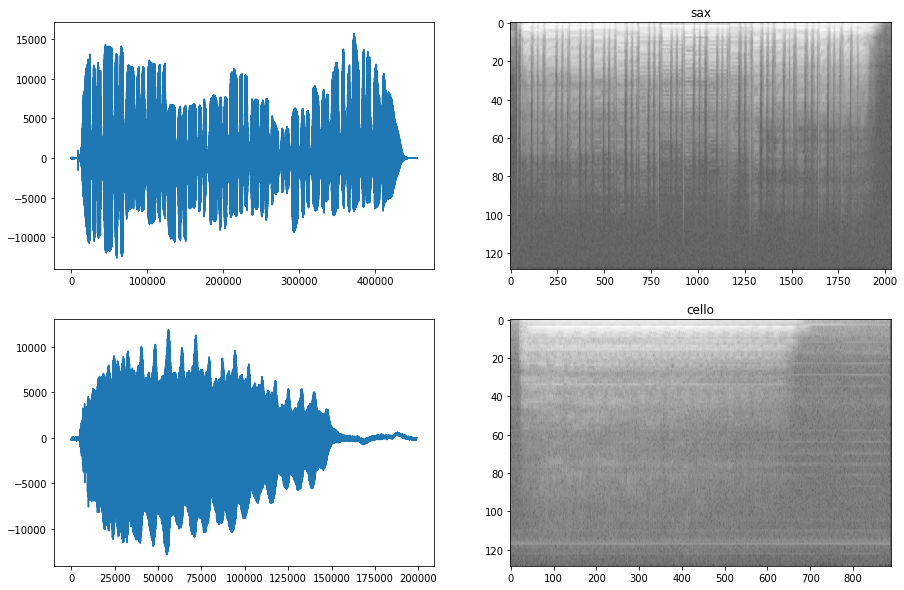

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import numpy as np

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for idx, instr in enumerate(['sax', 'cello']):
  sample_rate, samples = wavfile.read(instr + '.wav')
  ax[idx][0].plot(samples)
  _, _, spectro = signal.spectrogram(samples, sample_rate)
  img = np.log(spectro)
  ax[idx][1].imshow(img, cmap='gray', aspect='auto');
  ax[idx][1].set_title(instr)
  print(img.shape)

## Vision ML on video

Video consists of frames, each of which is an image.

In [ ]:
!curl -O https://www.engr.colostate.edu/me/facil/dynamics/files/flame.avi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  282k  100  282k    0     0   592k      0 --:--:-- --:--:-- --:--:--  593k


110


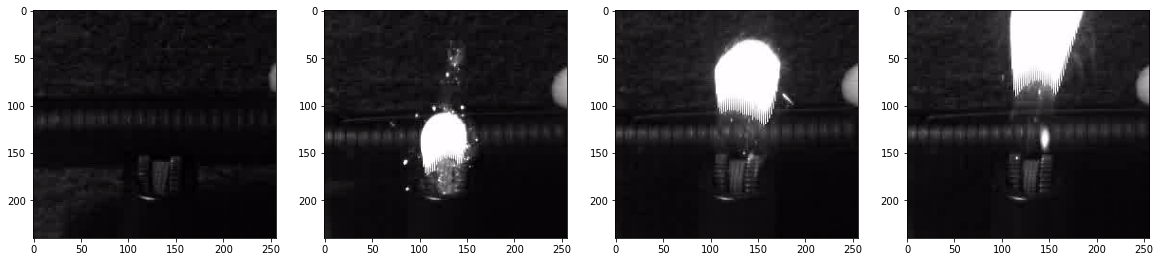

In [ ]:
## Frame-by-frame
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('flame.avi')
num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(num_frames)
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

for i in range(num_frames):
  ret, frame = cap.read()
  if ret:
    img = np.asarray(frame)
    if i%30 == 0:
      ax[i//30].imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


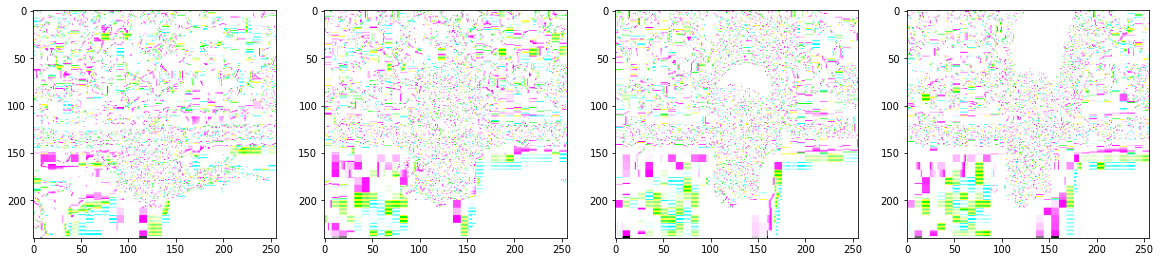

In [ ]:
## Rolling average of 30 frames at a time
def rolling_average(cap, N):
  img = None;
  n = 0
  for i in range(N):
    ret, frame = cap.read()
    if ret:
      frame = np.asarray(frame)
      if n > 0:
        img = frame + img
      else:
        img = frame
      n += 1
  if n > 0:
    return img / n
  return img

cap = cv2.VideoCapture('flame.avi')
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for i in range(4):
  img = rolling_average(cap, 25)
  ax[i].imshow(img)

In [ ]:
# read into a 4D shape
import tensorflow as tf
def read_video(filename):
  cap = cv2.VideoCapture(filename)
  num_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frames = []
  for i in range(num_frames):
    ret, frame = cap.read()
    if ret:
      frames.append(np.asarray(frame))
  return tf.convert_to_tensor(frames)

img4d = read_video('flame.avi')
print(img4d.shape)

(110, 240, 256, 3)


## Text

We can break down a paragraph into sentences.
And we can do sentence-embedding to get a numeric representation of each sentence.
A paragraph now becomes an image!

In [5]:
import tensorflow_hub as hub
paragraph = """
Siddhartha gave his clothes to a poor Brahmin on the road and
only retained his loincloth andearth-colored unstitched cloak.
He only ate once a day and never cooked food. He fasted fourteen
days. He fasted twenty-eight days. The flesh disappeared from
his legs and cheeks. Strange dreams were reflected in his enlarged
eyes. The nails grew long on his thin fingers and a dry, bristly
beard appeared on his chin. His glance became icy when he
encountered women; his lips curled with contempt when he passed
through a town of well-dressed people. He saw businessmen trading,
princes going to the hunt, mourners weeping over their dead,
prostitutes offering themselves, doctors attending the sick,
priests deciding the day for sowing, lovers making love, mothers
soothing their children -and all were not worth a passing glance,
everything lied, stank of lies; they were all illusions of sense,
happiness and beauty. All were doomed to decay. The world tasted
bitter. Life was pain.
"""

print(paragraph.split('.'))

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed(paragraph.split('.'))

['\nSiddhartha gave his clothes to a poor Brahmin on the road and\nonly retained his loincloth andearth-colored unstitched cloak', '\nHe only ate once a day and never cooked food', ' He fasted fourteen\ndays', ' He fasted twenty-eight days', ' The flesh disappeared from\nhis legs and cheeks', ' Strange dreams were reflected in his enlarged\neyes', ' The nails grew long on his thin fingers and a dry, bristly\nbeard appeared on his chin', ' His glance became icy when he\nencountered women; his lips curled with contempt when he passed\nthrough a town of well-dressed people', ' He saw businessmen trading,\nprinces going to the hunt, mourners weeping over their dead,\nprostitutes offering themselves, doctors attending the sick,\npriests deciding the day for sowing, lovers making love, mothers\nsoothing their children -and all were not worth a passing glance,\neverything lied, stank of lies; they were all illusions of sense,\nhappiness and beauty', ' All were doomed to decay', ' The world ta

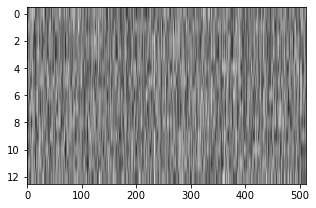

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,10))
plt.imshow(embeddings.numpy(), aspect=25.0, cmap='gray');

Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.